In this guided project, we'll practice the machine learning workflow we've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [2]:
import pandas as pd


cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[num_cols]

In [4]:
#replacing ? with Nan
import numpy as np
num_cars=num_cars.replace('?',np.NaN)

In [5]:
num_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [6]:
num_cars=num_cars.astype(float)

num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Now as we can that normalized-losses has considerable amount of missing values, what should we do about it?

1) Replace the missing values using the average values from that column.

2) Drop the rows entirely (especially if other columns in those rows have        missing values).

3) Drop the column entirely.

Here if we do only option 1 the graph of Normalized losses would be more focused towards the centre as it will increase the amount of mean values.

What we will do here is, since our predicting column is price for all those values in Normalized-losses which do not have a value for price, we will drop them and then fill in the remaning missing values with the mean .

We will do the same process for other variables as well.



In [7]:

num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
num_cars = num_cars.fillna(num_cars.mean())

In [9]:
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
num_cars.describe()


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


As we can see there is  difference between the range of values of different numeric columns, it will better to scale our columns in a range of 0 to 1 to have better normalization.

In [11]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = num_cars['price']
num_cars = (num_cars - num_cars.min())/(num_cars.max() - num_cars.min())
num_cars['price'] = price_col

In [12]:
num_cars.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


Now that we have all the numeric columns and normalized our table
we need to decide which parameters will be important for predicting the Car prices.

For this we will check the rmse score of each paramter by using KNeighbors with different values for k, later we will average the score and pickup the best parameters to predict our model.


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def knn_train_test(x,y,z):
    
    train, test = train_test_split(z[[x,y]],test_size=0.5,random_state=42)
    
      
    X_train= train.drop(y,axis=1)
    X_test= test.drop(y, axis=1)
    y_train=train[y]
    y_test=test[y]
    
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Make predictions using model.
        predicted_labels = knn.predict(X_test)

        # Calculate and return RMSE.
        mse = mean_squared_error(y_test, predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = num_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', num_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results
   
    

{'bore': {1: 7566.702868946995,
  3: 7452.447583042621,
  5: 7491.395330406456,
  7: 7920.854590900653,
  9: 7890.181437070301},
 'city-mpg': {1: 5761.228182281694,
  3: 4792.916005990931,
  5: 4815.0195587236285,
  7: 5117.845306466916,
  9: 5263.320895479962},
 'compression-rate': {1: 8685.012723646465,
  3: 7054.9986709796585,
  5: 7033.108313322829,
  7: 7519.681952288168,
  9: 8001.884236406097},
 'curb-weight': {1: 5562.593794514595,
  3: 5063.039067986776,
  5: 4558.819982894219,
  7: 4891.817453811459,
  9: 5038.117177543449},
 'height': {1: 8799.605435573925,
  3: 7901.335220260326,
  5: 8227.955008853825,
  7: 7979.704493956582,
  9: 7986.179401990505},
 'highway-mpg': {1: 6077.102039460898,
  3: 4900.739132866066,
  5: 4824.424622216161,
  7: 4905.235211722233,
  9: 5219.206269115508},
 'horsepower': {1: 4533.727491843442,
  3: 4120.915797878103,
  5: 3974.2394632043865,
  7: 4610.333160486009,
  9: 4934.774331204461},
 'length': {1: 5274.302104835227,
  3: 5423.72116220262,

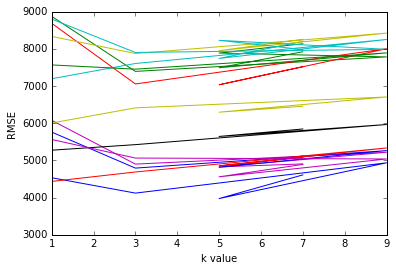

In [30]:
#lets visualize the above information 

import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [31]:
#let us now see which are the top features in our data 

# Computing average RMSE across different `k` values for each feature.

feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4434.798049
width                4878.125270
curb-weight          5022.877495
city-mpg             5150.065990
highway-mpg          5185.341455
length               5630.291318
wheel-base           6374.887876
compression-rate     7658.937179
bore                 7664.316362
stroke               7798.147881
normalized-losses    8013.692380
peak-rpm             8166.493602
height               8178.955912
dtype: float64

We will now train the same model again but now instead of using single feature we will
use top 3,4,5 features and see which gives us the lowest rmse result for different k values

In [36]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def knn_train_test(x,z):
    
    train, test = train_test_split(z[x],test_size=0.5,random_state=42)
    
      
    X_train= train.drop('price',axis=1)
    X_test= test.drop('price', axis=1)
    y_train=train['price']
    y_test=test['price']
    
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Make predictions using model.
        predicted_labels = knn.predict(X_test)

        # Calculate and return RMSE.
        mse = mean_squared_error(y_test, predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight','price']
rmse_val = knn_train_test(three_best_features , num_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg','price']
rmse_val = knn_train_test(four_best_features, num_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg','price']
rmse_val = knn_train_test(five_best_features, num_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 3194.6492036925533,
  3: 3372.2596448392314,
  5: 3833.9410263674326,
  7: 4262.227681180755,
  9: 4483.444861439855},
 'four best features': {1: 3241.329476044857,
  3: 3503.1576375383597,
  5: 3873.5751738318872,
  7: 4095.8462567214024,
  9: 4433.973825734636},
 'three best features': {1: 3407.091794338612,
  3: 3391.0100318789428,
  5: 3632.645170267708,
  7: 4060.7302947589474,
  9: 4404.115058593931}}

As we can see that using top 5 features along with single neighbor gives us a fairly low rmse score.